In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
path = r'Dataset/IR-assignment-2-data.txt'

In [3]:
file = open(path)

### total number of files

In [4]:
rel_score_list = []
res = []

In [5]:
# only qid:4 is extracted and stores values of relevance score in rel_score_list and stores complete row in res.
for l in file:
    lines = l.split()
    if (lines[1] == 'qid:4'):
        rel_score_list.append(lines[0])
        res.append(lines)

In [6]:
# sort the result in max DCG order
df_arrange = res.sort(reverse = True)

In [7]:
# calculate total number of files
rel_score_count = {}
for val in rel_score_list:
    c = 0
    for lists in res:
        if (lists[0] == val):
            c = c + 1
    rel_score_count[val] = c

In [8]:
#print(rel_score_count)

In [9]:
tot_files = 1
for k in rel_score_count.keys():
    tot_files = tot_files * math.factorial(rel_score_count[k])

In [10]:
print(tot_files)

19893497375938370599826047614905329896936840170566570588205180312704857992695193482412686565431050240000000000000000000000


### Calculate nDCG

In [11]:
df = pd.read_csv("Dataset/IR-assignment-2-data.txt", sep = ' ', header = None)

In [12]:
df_res = df[df[1] == 'qid:4']
df_sort = df_res.sort_values(by = 0, ascending = False)
df_sort = df_sort.reset_index(drop = True)

In [13]:
def calDCG(df, k):
    dcg_res = 0
    for i in range(1, k+1):
        dcg_res = dcg_res + (pow(2, df[0][i-1]) - 1)/(np.log2(i+1))
    return dcg_res

In [14]:
print("nDCG at 50:",calDCG(df_res,50)/calDCG(df_sort,50))
print("nDCG for whole dataset:",calDCG(df_res,len(df_res))/calDCG(df_sort,len(df_res)))

nDCG at 50: 0.35612494416255847
nDCG for whole dataset: 0.5784691984582591


### Precision-Recall Graph

In [15]:
file = open(path)
rel_doc = 0
data_list = []

In [16]:
for l in file:
    lines = l.split()
    if (lines[1] == 'qid:4'):
        feature75 = lines[76].split(":")[1]
        if(lines[0] == '0'):                         # if the rel score is 0 then not counted in rel_doc
            data_list.append([0, float(feature75)])
        else:
            data_list.append([1, float(feature75)]) 
            rel_doc = rel_doc + 1                  # counted as rel_doc when rel score is not 0

In [17]:
# sort the list in the reverse order to plot graph
data_list = sorted(data_list, key = lambda k:k[1], reverse = True) 
#print(data_list)

In [18]:
c = 1
precision = []
recall = []
correct_relevant = 0

for i in range(len(data_list)):
    precision.append(correct_relevant/c) # precision formula append
    recall.append(correct_relevant/ rel_doc) # recall formula append
    l = data_list[i]
    if (l[0] == 1):                        # doc is rightly classified when the value is 1
        correct_relevant = correct_relevant + 1
    c = c + 1  

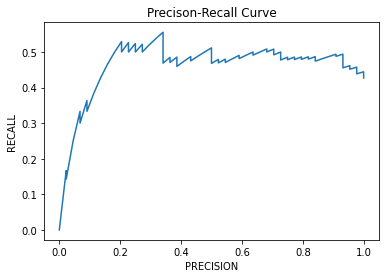

In [19]:
# Precision - Recall Graph
plt.xlabel("PRECISION")
plt.ylabel("RECALL")
plt.title("Precison-Recall Curve")
plt.plot(recall, precision)
plt.show();